<font color="dark blue">Final Exam of Msc AI & Business Analytics, made in 4 hours

---
# Prediction of Diseases, hyperthyroidism
---
<font color="grey">*By Mehdi BALOUKA*

# 1 Import Libraries

In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

2- Data discovery: ETL

Let's import the data:

In [27]:
# Load the dataset with the correct delimiter
data = pd.read_csv('/workspaces/All-My-Projects/My Final Exam - 4 hours Machine Learning/sampled_data3.csv', delimiter=';')
#Consider only rows 1 to 20000
data = data.iloc[1:20000]
# Dropping the first column if it's just an identifier
data = data.drop(columns=[data.columns[0]])

Transformation step:
* categorization of variables;
* clean the dataset;
* recoding variables and columns if needed.

In [28]:

# 1-CATEGORICAL COLUMNS:
# Convert categorical columns to appropriate types
categorical_columns = [
    'High_Blood_Pression', 'High_Cholesterol', 'Cholesterol_Check',
    'Smoking', 'Stroke', 'Heart_Disease', 'Physical_Activity', 'Fruits',
    'Vegetables', 'Alcohol', 'Health_care', 'Diff_Walk', 'Sex',
    'General_Health', 'Mental_Health', 'Physical_Health', 'Age', 'Education', 'Income'
]
# Ensure all categorical columns are integers
data[categorical_columns] = data[categorical_columns].astype(int)

# Combine 'Vegetables' and 'Fruits' into 'Healthy_Food' as a sum
data['Healthy_Food'] = data['Vegetables'] + data['Fruits']
# Drop the original 'Vegetables' and 'Fruits' columns and 'Diff_Walk'
data = data.drop(columns=['Vegetables', 'Fruits', 'Diff_Walk'])

# 2- NUMERICAL
# Convert columns with potential decimal points correctly
numerical_columns = ['Body_Mass_Index', 'General_Health', 'Mental_Health', 'Physical_Health', 'Age']
from sklearn.impute import SimpleImputer
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
# Check for any NaNs introduced in the numerical columns and fill them
imputer = SimpleImputer(strategy='most_frequent')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

# 3- TARGET
# Ensure target variable is of integer type
data['hyperthyroidism'] = data['hyperthyroidism'].astype(int)

# Display the cleaned and processed data
print(data.dtypes)
print(data.head())

hyperthyroidism          int64
High_Blood_Pression      int64
High_Cholesterol         int64
Cholesterol_Check        int64
Body_Mass_Index        float64
Smoking                  int64
Stroke                   int64
Heart_Disease            int64
Physical_Activity        int64
Alcohol                  int64
Health_care              int64
General_Health         float64
Mental_Health          float64
Physical_Health        float64
Sex                      int64
Age                    float64
Education                int64
Income                   int64
Healthy_Food             int64
dtype: object
   hyperthyroidism  High_Blood_Pression  High_Cholesterol  Cholesterol_Check  \
1                0                    0                 1                  1   
2                0                    0                 0                  0   
3                0                    0                 1                  1   
4                0                    1                 0                  1 

Discovery phase: EDA

In [12]:
# STEP 2 : EDA

# New Libraries used:
import seaborn as sns

# Summary statistics for the entire dataset
print(data.describe())

       hyperthyroidism  High_Blood_Pression  High_Cholesterol  \
count     19999.000000         19999.000000      19999.000000   
mean          0.137907             0.432322          0.422671   
std           0.344811             0.495411          0.493996   
min           0.000000             0.000000          0.000000   
25%           0.000000             0.000000          0.000000   
50%           0.000000             0.000000          0.000000   
75%           0.000000             1.000000          1.000000   
max           1.000000             1.000000          1.000000   

       Cholesterol_Check  Body_Mass_Index       Smoking        Stroke  \
count       19999.000000     19999.000000  19999.000000  19999.000000   
mean            0.963598        28.301115      0.444622      0.038702   
std             0.187293         6.510927      0.496936      0.192888   
min             0.000000        12.000000      0.000000      0.000000   
25%             1.000000        24.000000      0.

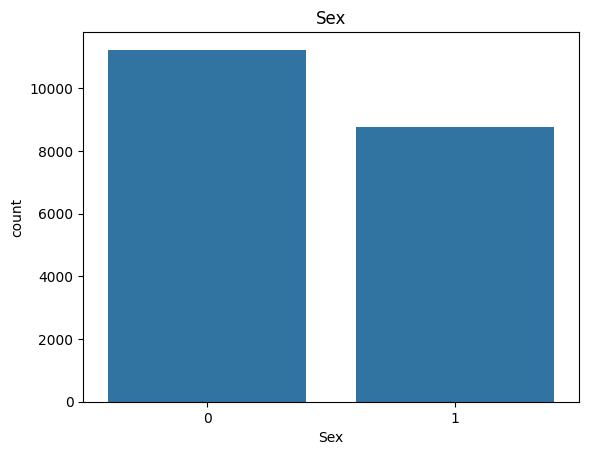

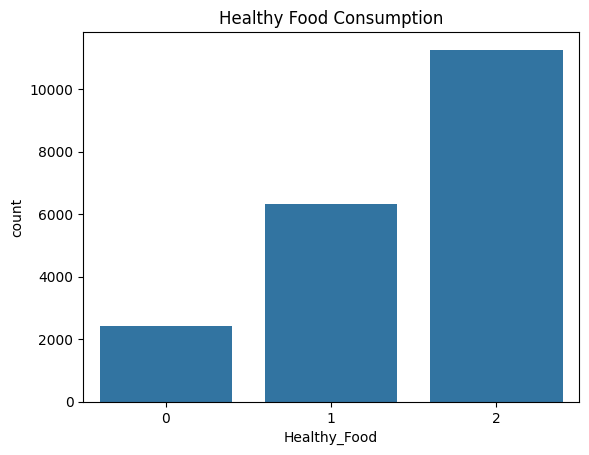

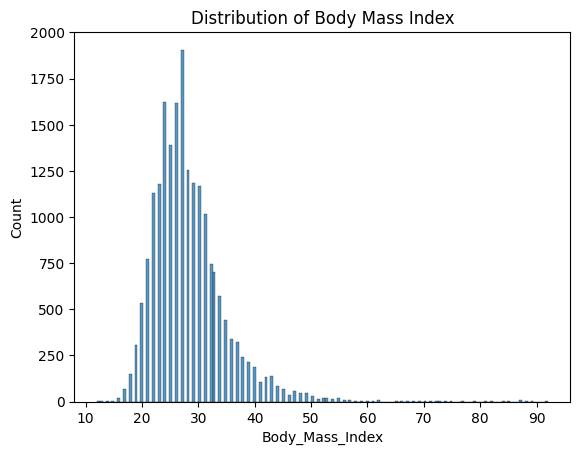

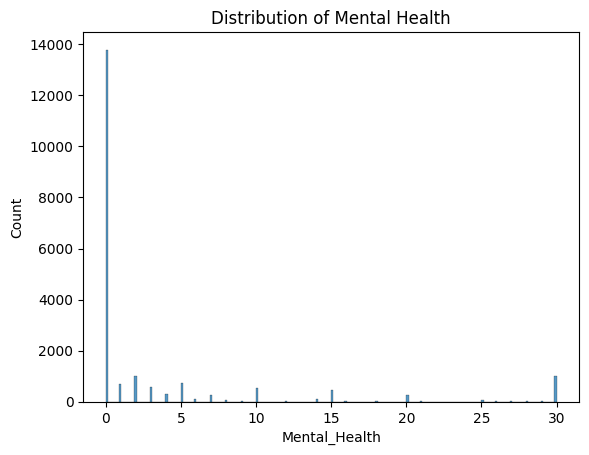

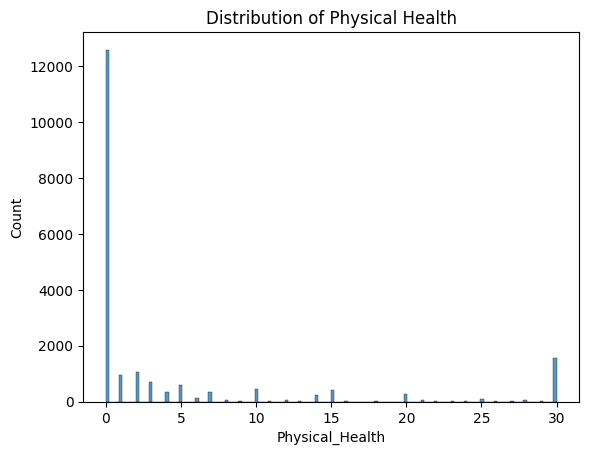

In [13]:
# Visualize the distribution of numerical features
# Visualize the count of categorical features
import matplotlib.pyplot as plt

sns.countplot(x=data['Sex'])
plt.title('Sex')
plt.show()

sns.countplot(x=data['Healthy_Food'])
plt.title('Healthy Food Consumption')
plt.show()

sns.histplot(data['Body_Mass_Index'])
plt.title('Distribution of Body Mass Index')
plt.show()

sns.histplot(data['Mental_Health'])
plt.title('Distribution of Mental Health')
plt.show()

sns.histplot(data['Physical_Health'])
plt.title('Distribution of Physical Health')
plt.show()


Seen the results, I want to deep dive regarding Physical & Mental Health, distribution seems a bit weird. Logically I want to reclassify it but just let's deep dive through a box plot!

count    19999.000000
mean         3.241712
std          7.482304
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         30.000000
Name: Mental_Health, dtype: float64
count    19999.000000
mean         4.312816
std          8.788855
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: Physical_Health, dtype: float64


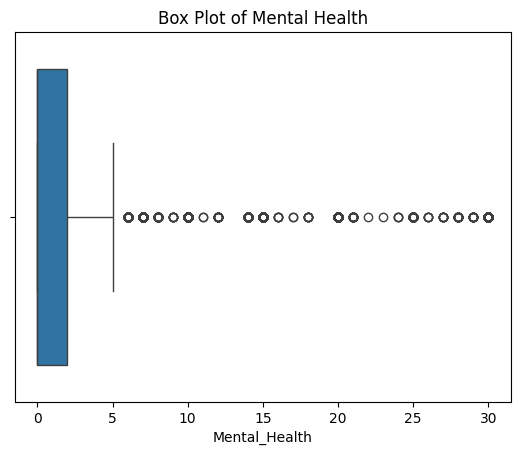

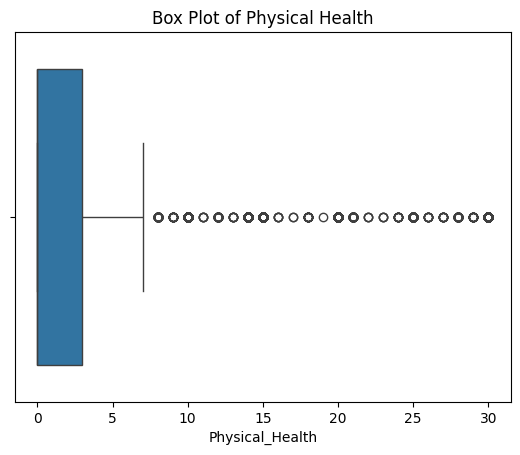

In [14]:
# Summary statistics
print(data['Mental_Health'].describe())
print(data['Physical_Health'].describe())

sns.boxplot(x=data['Mental_Health'])
plt.title('Box Plot of Mental Health')
plt.show()

sns.boxplot(x=data['Physical_Health'])
plt.title('Box Plot of Physical Health')
plt.show()

Seeing the distribution, I will reclassify these data in categories (will be more easy for interpretation!)

In [29]:
# Ensure the columns exist
# Define categories based on the distributions
bins = [0, 1, 5, 10, 30]
labels = [0, 1, 2, 3]

# Apply the bins and labels before dropping the original columns
data['Mental_Health_Category'] = pd.cut(data['Mental_Health'], bins=bins, labels=labels, right=False)
data['Physical_Health_Category'] = pd.cut(data['Physical_Health'], bins=bins, labels=labels, right=False)


In [30]:
# Drop the original columns
data = data.drop(columns=['Mental_Health', 'Physical_Health'])
data = data.dropna()


# Display the modified data
print(data.dtypes)
print(data.head())

hyperthyroidism                int64
High_Blood_Pression            int64
High_Cholesterol               int64
Cholesterol_Check              int64
Body_Mass_Index              float64
Smoking                        int64
Stroke                         int64
Heart_Disease                  int64
Physical_Activity              int64
Alcohol                        int64
Health_care                    int64
General_Health               float64
Sex                            int64
Age                          float64
Education                      int64
Income                         int64
Healthy_Food                   int64
Mental_Health_Category      category
Physical_Health_Category    category
dtype: object
   hyperthyroidism  High_Blood_Pression  High_Cholesterol  Cholesterol_Check  \
1                0                    0                 1                  1   
2                0                    0                 0                  0   
3                0                    0    

Now, let's analyze the **Distribution of the target.**

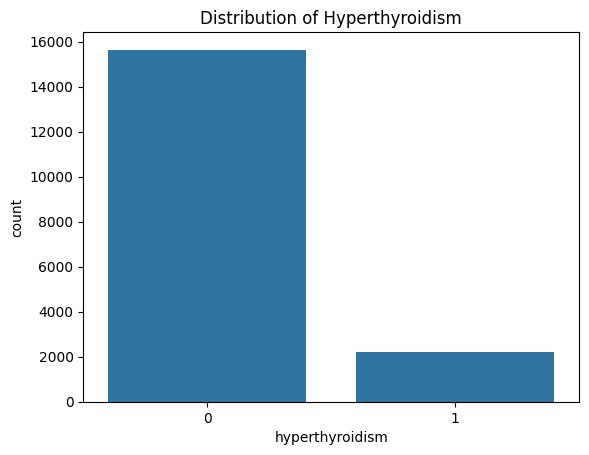

In [17]:
# Distribution of the target
sns.countplot(x=data['hyperthyroidism'])
plt.title('Distribution of Hyperthyroidism')
plt.show()

Distribution is not equal. We will process later a resampling of the dataset to balance it.

Now, let's understand what is influencing hyperthyroidism the more with a correlation matrix:
# Correlation Matrix

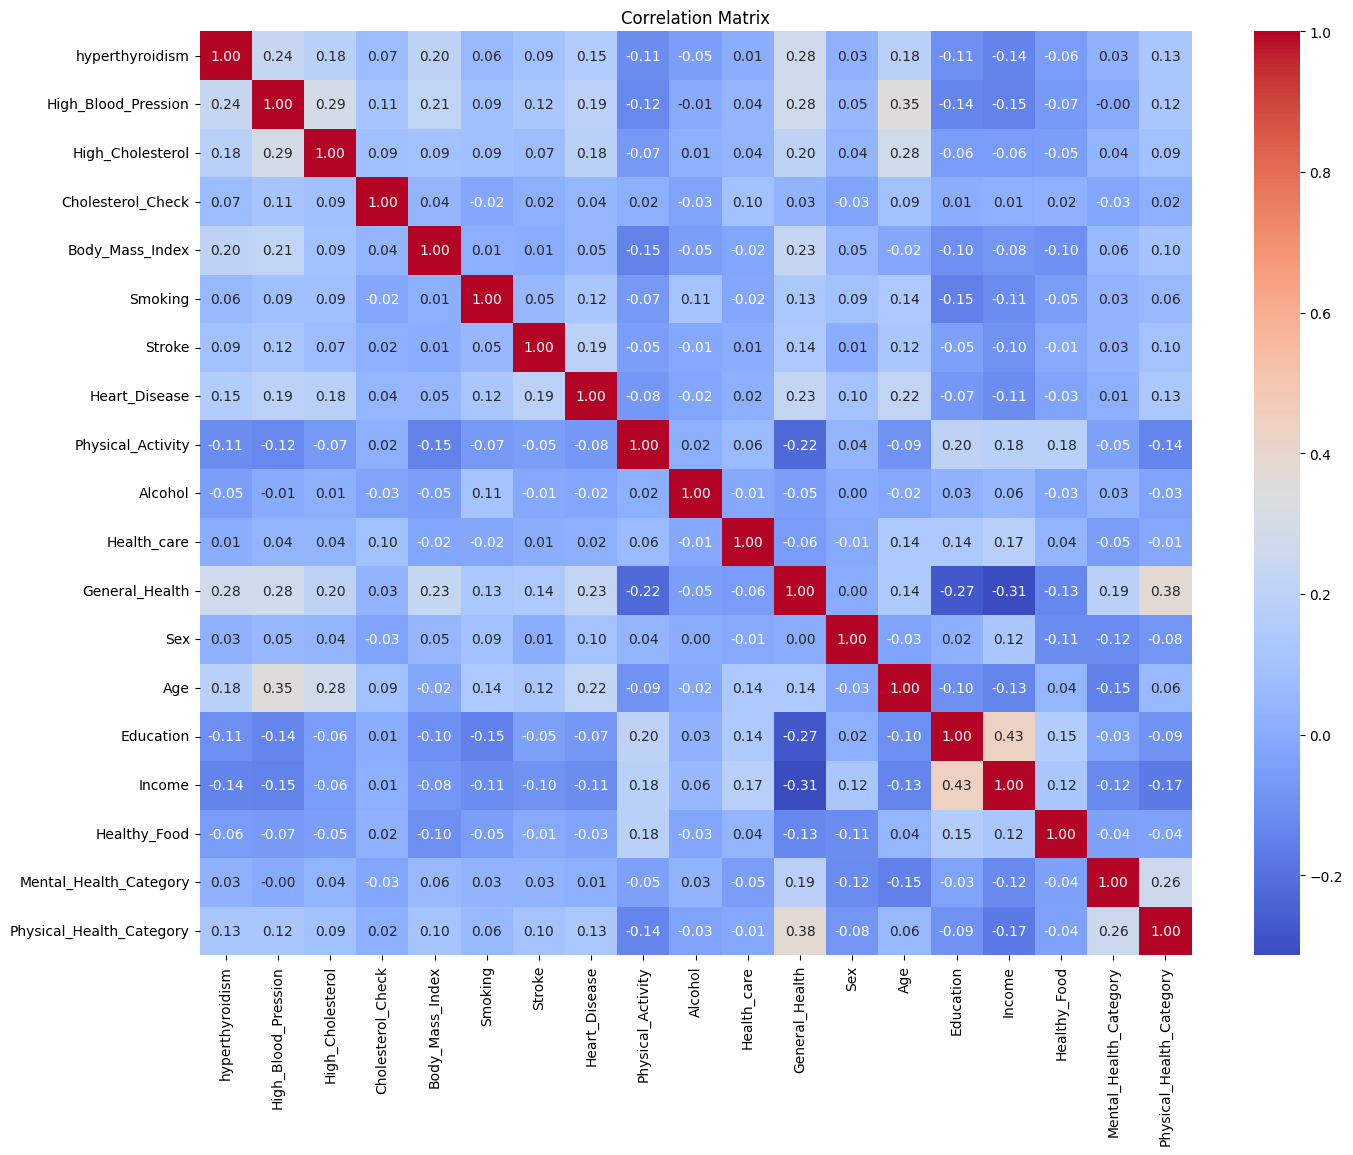

In [18]:
# Correlation matrix
corr_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

I have noticed some correlation very low with hyperthyroidism that I will eliminate. Let's process:

In [19]:
# Remove low correlation features:

# Identify features with correlation < 0.05 with hyperthyroidism
low_corr_features = corr_matrix['hyperthyroidism'][corr_matrix['hyperthyroidism'].abs() < 0.05].index.tolist()
print(f"Features to remove due to low correlation: {low_corr_features}")

# Remove features with low correlation
data = data.drop(columns=low_corr_features)

Features to remove due to low correlation: ['Alcohol', 'Health_care', 'Sex', 'Mental_Health_Category']


### Numerical Data distribution

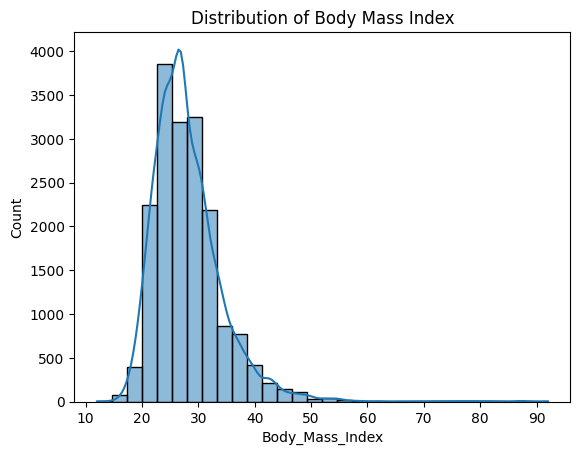

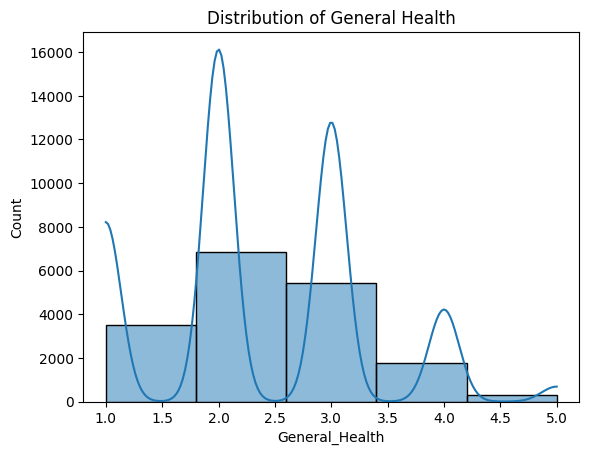

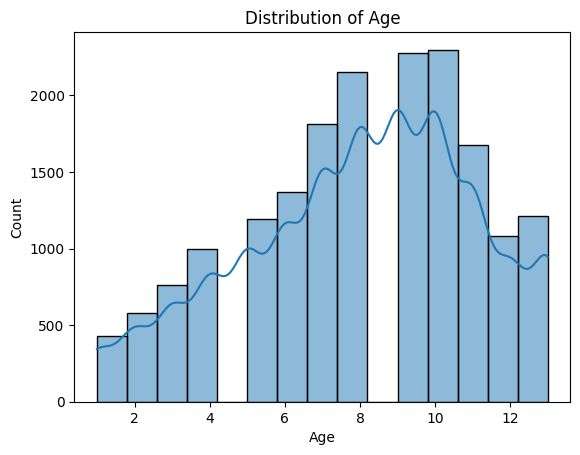

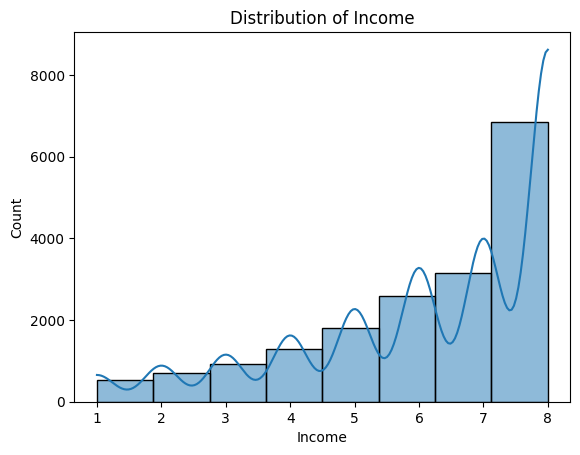

In [20]:
# 1- Distribution of Body Mass Index
sns.histplot(data['Body_Mass_Index'], bins=30, kde=True)
plt.title('Distribution of Body Mass Index')
plt.show()

# 2- Distribution of General Health
sns.histplot(data['General_Health'], bins=5, kde=True)
plt.title('Distribution of General Health')
plt.show()

# 3- Distribution of Age
sns.histplot(data['Age'], bins=15, kde=True)
plt.title('Distribution of Age')
plt.show()

# 4-Distribution of Income (even if that's a category)
sns.histplot(data['Income'], bins=8, kde=True)
plt.title('Distribution of Income')
plt.show()

### Distribution of Categorical Features

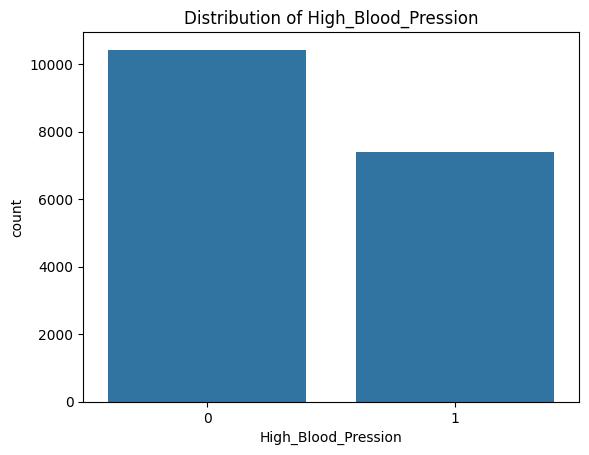

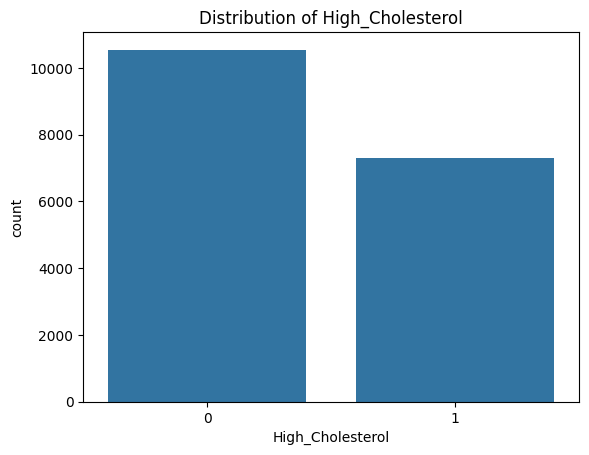

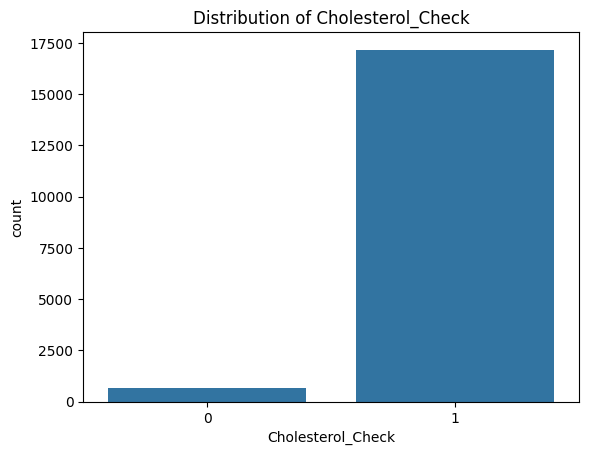

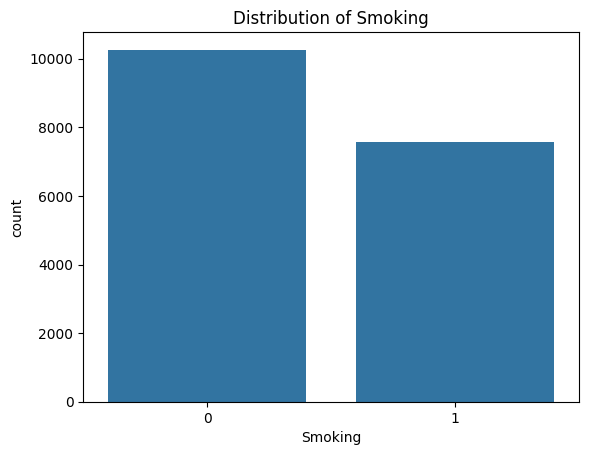

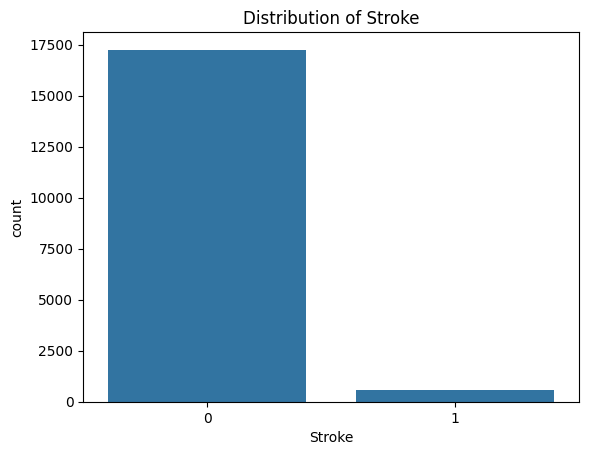

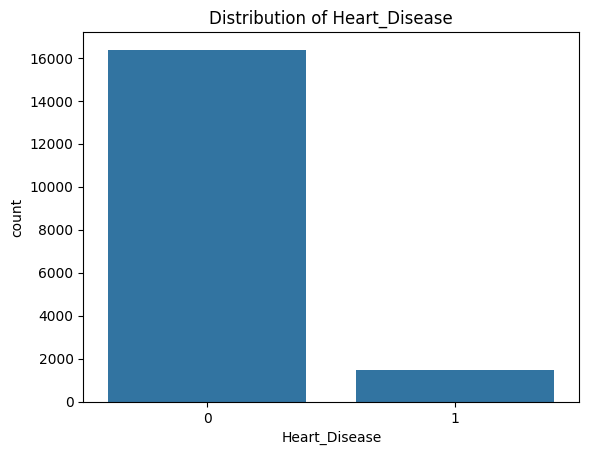

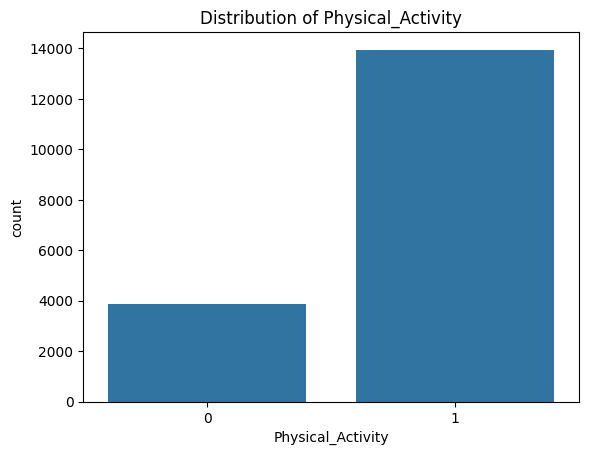

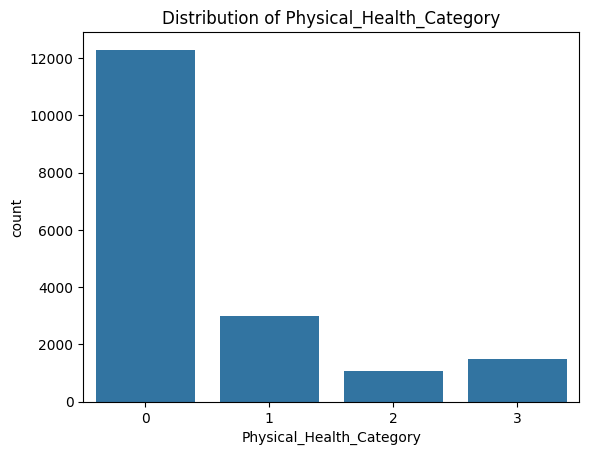

In [21]:
# Categorical features count plots
categorical_features = [
    'High_Blood_Pression', 'High_Cholesterol', 'Cholesterol_Check', 'Smoking', 'Stroke', 'Heart_Disease', 'Physical_Activity', 'Physical_Health_Category'
]

for feature in categorical_features:
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

# Modeling
##Model Training and Evaluation


In [22]:
# Separate features and target variable
X = data.drop('hyperthyroidism', axis=1)
y = data['hyperthyroidism']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

As I have 4 hours, I thought about using for sure classification method (KNN, DT,..) but also go deeper to choose the best model!

In [23]:
# Library importation for modeling
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

In [31]:
# Define the models
models = {
    'MLP': MLPClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Bagging with Decision Tree': BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=20, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

TypeError: BaggingClassifier.__init__() got an unexpected keyword argument 'base_estimator'

As I faced an issue with my new column created: Physical_Health_Category with NA, I have decided to remove these lines as I run out of time.

In [32]:
# Train & Evaluate the model:
def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)
        report = classification_report(y_test, y_pred)

        results[model_name] = {
            'accuracy': accuracy,
            'roc_auc': roc_auc,
            'report': report
        }

        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy}")
        print(f"AUC-ROC Score: {roc_auc}")
        print(f"Classification Report:\n{report}\n")
    return results

# Train and evaluate each model
results = train_and_evaluate(models, X_train, X_test, y_train, y_test)

NameError: name 'models' is not defined

As I remember well, datatset is imbalanced (low number of targets). Therefore it shows that most models are showing high accuracy but struggle recalling the minority class.

Let's resampling the model

In [ ]:
from imblearn.over_sampling import SMOTE

# Resampling the training set
smote = SMOTE(random_state=42)
# Separate features and target variable
X = data.drop('hyperthyroidism', axis=1)


y = data['hyperthyroidism']


X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled = X_train_resampled.fillna(0)
y_train_resampled = y_train_resampled.fillna(0)


print("Resampled dataset shape:", X_train_resampled.shape, y_train_resampled.shape)

Resampled dataset shape: (25040, 14) (25040,)


In [ ]:
# Train and evaluate models
def train_and_evaluate(models, X_train_resampled, X_test, y_train_resampled, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)
        report = classification_report(y_test, y_pred)

        results[model_name] = {
            'accuracy': accuracy,
            'roc_auc': roc_auc,
            'report': report
        }

        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy}")
        print(f"AUC-ROC Score: {roc_auc}")
        print(f"Classification Report:\n{report}\n")
    return results

# Train and evaluate each model
results = train_and_evaluate(models, X_train_resampled, X_test, y_train_resampled, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: MLP
Accuracy: 0.7311466218110457
AUC-ROC Score: 0.7586122793229145
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.75      0.83      3121
           1       0.26      0.61      0.36       446

    accuracy                           0.73      3567
   macro avg       0.59      0.68      0.60      3567
weighted avg       0.85      0.73      0.77      3567


Model: Naive Bayes
Accuracy: 0.6215306980656014
AUC-ROC Score: 0.7715156117318958
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      3121
           1       0.22      0.81      0.35       446

    accuracy                           0.62      3567
   macro avg       0.59      0.70      0.54      3567
weighted avg       0.86      0.62      0.69      3567


Model: KNN
Accuracy: 0.7081581160639192
AUC-ROC Score: 0.6885189724461661
Classification Report:
              precision    recall  f1-score  

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Model: Bagging with Decision Tree
Accuracy: 0.8340342024109896
AUC-ROC Score: 0.7289050163581582
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3121
           1       0.30      0.25      0.27       446

    accuracy                           0.83      3567
   macro avg       0.60      0.58      0.59      3567
weighted avg       0.82      0.83      0.83      3567


Model: AdaBoost
Accuracy: 0.7706756377908607
AUC-ROC Score: 0.7624079898503269
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3121
           1       0.28      0.55      0.38       446

    accuracy                           0.77      3567
   macro avg       0.61      0.68      0.62      3567
weighted avg       0.85      0.77      0.80      3567


Model: Gradient Boosting
Accuracy: 0.8009531819456126
AUC-ROC Score: 0.7818247715820645
Classification Report:
           

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(models, X_train_resampled, y_train_resampled, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for model_name, model in models.items():
        model.fit(X_train_resampled, y_train_resampled)

        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# After training and evaluating the models, plot the ROC curves
plot_roc_curve(models, X_train_resampled, y_train_resampled, X_test, y_test)

I'm very glad of these results in 4 horus!!!!

Summary of the AUC scores for each model:
	•	SVM: 0.78
	•	Gradient Boosting: 0.78
	•	Naive Bayes: 0.77
	•	MLP: 0.76
	•	Logistic Regression: 0.76
	•	Random Forest: 0.76
	•	AdaBoost: 0.76
	•	Bagging with Decision Tree: 0.73
	•	KNN: 0.69
	•	Decision Tree: 0.59


Let's process now **Hyperparameter Tuning** to  improve the performance, tuning the hyperparameters of the top-performing models (all unless DT, Bagging + DT and KNN)



In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(probability=True, class_weight='balanced'), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best AUC score found: ", grid_search.best_score_)

NameError: name 'X_train_resampled' is not defined

I ran out of time unfortunately, could not continue further. 😞

# Conclusion and Next Steps

#### Work Completed:

1. **Data Loading and Cleaning**:
    - Loaded the dataset and dropped unnecessary columns;
    - Correctly parsed numerical columns and handled missing values;
    - Converted categorical columns to appropriate types.

2. **Feature Management**:
    - Combined 'Vegetables' and 'Fruits' into a 'Healthy_Food' feature;
    - Reclassified 'Physical_Health' into categorical bins


3. **Handling Imbalanced Data**:
    - Used SMOTE to resample the training dataset to handle class imbalance.

4. **Model Training and Evaluation**:
    - Trained and evaluated multiple models including MLP, Naive Bayes, KNN, Decision Tree, Logistic Regression, SVM, Random Forest, Bagging, AdaBoost, and Gradient Boosting.
    - Plotted ROC curves to compare the performance of different models.

5. **Preliminary Results**:
    - SVM and Gradient Boosting showed the highest ROC AUC scores (~0.78).
    - Decision Tree and KNN had the lowest performance among the models tested.

#### Next Steps:

Unfortunately, I ran out of time and could not continue further. 😞

But I was planning to:

1. **Hyperparameter Tuning**:
    - Use `GridSearchCV` to fine-tune hyperparameters for the top-performing models (SVM, Gradient Boosting, Naive Bayes).

2. **Cross-Validation**:
    - Implement cross-validation to ensure the robustness of the model performance and avoid overfitting.